# Cash Flow 1 year Growth (CFO1yrGrowth)

(by Wei and Avril)

### DEFINITION

Sometimes, even when a company is profitable, it doesn’t necessarily mean
that it has a healthy cash flow. Profitability and cash flow are not the same
— profits can be reported without generating actual cash. This situation
can arise due to factors like delayed payments, high inventory levels, or
accounting adjustments.


It’s   crucial   to   track   CFO   growth   because   it   reflects   how   effectively   a
company is generating cash from its core business operations. A positive
and growing CFO indicates that the company is not only profitable but also
maintaining   a   solid   cash   position,   which   is   essential   for   sustaining
operations, paying debts, and funding growth.

It is usually expected that high CFO Growth would lead to higher monthly stock returns.

In [8]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the CFO growth database
df_cfogrowth = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name = 'CFO1yrGrowth', index_col=0)
df_cfogrowth.head()

,NasdaqGS:MSFT,NasdaqGS:AAPL,NasdaqGS:NVDA,NasdaqGS:AMZN,NasdaqGS:GOOGL,NasdaqGS:META,NYSE:BRK.B,NasdaqGS:AVGO,NasdaqGS:TSLA,NYSE:LLY,...,NYSE:IVZ,NYSE:DVA,NasdaqGS:AAL,NYSE:MHK,NYSE:BEN,NYSE:RL,NYSE:BIO,NasdaqGS:PARA,NasdaqGS:FOX,NasdaqGS:NWS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-20,35.3565,-0.0275,494.1064,74.5638,5.9682,41.2754,21.1433,7.9623,-17.3689,-27.7496,...,26.5342,-7.9587,-53.6249,24.1279,3.0224,69.1231,20.6856,NM,2.2222,0.5494
2024-06-30,35.3565,-0.0275,494.1064,74.5638,5.9682,41.2754,21.1433,7.9623,-17.3689,-27.7496,...,26.5342,-7.9587,-53.6249,24.1279,3.0224,69.1231,20.6856,NM,2.2222,0.5494
2024-05-31,31.9770,0.8933,494.1064,82.4903,19.1183,51.5189,30.2215,7.9623,-17.0443,-45.8953,...,37.3175,-14.2701,-38.6717,44.0769,-0.2654,160.2676,43.1971,NM,-35.9822,27.2635
2024-04-30,31.9770,0.8933,494.1064,82.4903,19.1183,51.5189,30.2215,9.1287,-17.0443,-45.8953,...,37.3175,-14.2701,-38.6717,44.0769,-0.2654,160.2676,43.1971,NM,-35.9822,27.2635
2024-03-31,31.9770,0.8933,397.9613,82.4903,19.1183,51.5189,30.2215,9.1287,-17.0443,-45.8953,...,37.3175,-14.2701,-38.6717,44.0769,-0.2654,160.2676,43.1971,NM,-35.9822,27.2635


In [9]:
# Renaming Columns to remove punctuation
df_cfogrowth.columns = [column.split(":")[-1] for column in df_cfogrowth.columns]

In [10]:
# Have a brief understanding of the 'CFO growth' data
df_cfogrowth.describe()

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,LLY,JPM,...,ETSY,GL,PAYC,IVZ,DVA,MHK,RL,BIO,FOX,NWS
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,14.007600,8.492192,65.363151,38.550567,19.429799,35.248417,7.175815,41.467272,3.748608,0.0,...,62.007348,4.523271,47.806857,30.324129,5.370023,16.176178,16.220016,16.133092,8.619242,6.310023
std,10.313336,16.764674,111.952399,35.427869,13.543975,30.606578,17.249966,37.058620,32.843356,0.0,...,74.667109,15.769663,42.616446,95.262135,36.486543,37.321719,69.337515,51.218455,32.105735,28.200671
min,-8.719500,-22.048100,-38.065500,-41.493500,-7.767600,-15.323400,-22.593900,6.004000,-45.895300,0.0,...,-29.473600,-22.744300,0.619000,-85.691800,-44.226800,-57.475300,-70.436000,-70.963500,-40.263400,-43.735800
25%,9.256700,-3.447200,20.318300,15.634400,10.121600,18.185700,-1.621400,13.674000,-22.428200,0.0,...,4.469900,-2.773100,17.989250,-33.464300,-18.971000,-10.914400,-26.502600,-25.753900,-4.458600,-15.948300
50%,16.063900,5.913500,31.847400,45.289500,17.489700,36.563400,3.670800,24.752000,-1.424300,0.0,...,30.988100,2.436100,32.840300,10.379300,-2.686700,20.097100,2.361900,14.444400,0.000000,0.549400
75%,20.732100,18.988300,64.015900,68.870500,27.244100,48.853950,22.433900,61.195450,15.761600,0.0,...,109.619000,8.252900,75.259800,47.388200,19.813300,42.509600,21.967500,51.970350,28.552300,26.651900
max,35.356500,43.763600,494.106400,88.863800,57.180700,116.534000,40.068000,131.321500,91.145800,0.0,...,288.910700,43.346700,180.745800,344.915200,134.525800,99.215400,230.597500,174.152300,91.647600,89.026000


In [11]:
df_cfogrowth.info() # 81 observations are 'objects', indicating non-numeric values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2024-07-20 to 2015-01-31
Columns: 415 entries, MSFT to NWS
dtypes: float64(396), int64(19)
memory usage: 373.8 KB


In [12]:
# Convert non-numerical data into numerical data type
df_cfogrowth = df_cfogrowth.select_dtypes(include='number')

In [13]:
# Look for the missing values
df_cfogrowth.isnull().sum()

MSFT     0
AAPL     0
NVDA     0
AMZN     0
GOOGL    0
        ..
MHK      0
RL       0
BIO      0
FOX      0
NWS      0
Length: 415, dtype: int64

In [14]:
# Function to only keep the columns where the ratio of 0s is less than 50%.
def drop_cols_with_many_zeros(df, threshold=0.5):
    # Calculate the percentage of 0s in each column
    zero_ratio = (df == 0).sum() / len(df)
    # Keep only columns where the ratio of 0s is less than the threshold
    return df.loc[:, zero_ratio < threshold]

In [15]:
df_cfogrowth = drop_cols_with_many_zeros(df_cfogrowth)
df_cfogrowth

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,LLY,XOM,...,ETSY,GL,PAYC,IVZ,DVA,MHK,RL,BIO,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-20,35.3565,-0.0275,494.1064,74.5638,5.9682,41.2754,21.1433,7.9623,-27.7496,-19.0365,...,6.3007,-8.4634,14.6477,26.5342,-7.9587,24.1279,69.1231,20.6856,2.2222,0.5494
2024-06-30,35.3565,-0.0275,494.1064,74.5638,5.9682,41.2754,21.1433,7.9623,-27.7496,-19.0365,...,6.3007,-8.4634,14.6477,26.5342,-7.9587,24.1279,69.1231,20.6856,2.2222,0.5494
2024-05-31,31.9770,0.8933,494.1064,82.4903,19.1183,51.5189,30.2215,7.9623,-45.8953,-31.4717,...,5.7696,-9.7505,23.7565,37.3175,-14.2701,44.0769,160.2676,43.1971,-35.9822,27.2635
2024-04-30,31.9770,0.8933,494.1064,82.4903,19.1183,51.5189,30.2215,9.1287,-45.8953,-31.4717,...,5.7696,-9.7505,23.7565,37.3175,-14.2701,44.0769,160.2676,43.1971,-35.9822,27.2635
2024-03-31,31.9770,0.8933,397.9613,82.4903,19.1183,51.5189,30.2215,9.1287,-45.8953,-31.4717,...,5.7696,-9.7505,23.7565,37.3175,-14.2701,44.0769,160.2676,43.1971,-35.9822,27.2635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-31,12.9734,41.4578,23.5046,46.7726,27.2441,22.6399,24.3368,121.8335,-28.7479,-18.1239,...,-23.7158,-21.2157,137.7704,30.3844,-20.0113,38.6223,-1.5105,12.5773,0.0000,-20.4752
2015-04-30,12.9734,41.4578,23.5046,46.7726,27.2441,22.6399,24.3368,86.2924,-28.7479,-18.1239,...,-23.7158,-21.2157,137.7704,30.3844,-20.0113,38.6223,-1.5105,12.5773,0.0000,-20.4752
2015-03-31,12.9734,41.4578,8.5029,46.7726,27.2441,22.6399,24.3368,86.2924,-28.7479,-18.1239,...,-23.7158,-21.2157,137.7704,30.3844,-20.0113,26.0918,-1.5105,12.5773,0.0000,-20.4752


In [16]:
# Function to handle the outliers
def winsorize_series(series, lower_pct=0.05, upper_pct=0.95):
    lower = series.quantile(lower_pct)
    upper = series.quantile(upper_pct)
    return series.clip(lower, upper)

df_cfogrowth = df_cfogrowth.apply(lambda col: winsorize_series(col) if col.dtype != 'O' else col)

In [17]:
df_cfogrowth

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,LLY,XOM,...,ETSY,GL,PAYC,IVZ,DVA,MHK,RL,BIO,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-20,26.4771,-0.02750,397.9613,74.56380,5.9682,41.2754,21.1433,7.9623,-27.74960,-19.0365,...,6.3007,-8.4634,14.64770,26.5342,-7.9587,24.1279,69.1231,20.6856,2.2222,0.5494
2024-06-30,26.4771,-0.02750,397.9613,74.56380,5.9682,41.2754,21.1433,7.9623,-27.74960,-19.0365,...,6.3007,-8.4634,14.64770,26.5342,-7.9587,24.1279,69.1231,20.6856,2.2222,0.5494
2024-05-31,26.4771,0.89330,397.9613,81.93352,19.1183,51.5189,30.2215,7.9623,-36.68494,-31.4717,...,5.7696,-9.7505,23.75650,37.3175,-14.2701,44.0769,160.2676,43.1971,-35.9822,27.2635
2024-04-30,26.4771,0.89330,397.9613,81.93352,19.1183,51.5189,30.2215,9.1287,-36.68494,-31.4717,...,5.7696,-9.7505,23.75650,37.3175,-14.2701,44.0769,160.2676,43.1971,-35.9822,27.2635
2024-03-31,26.4771,0.89330,397.9613,81.93352,19.1183,51.5189,30.2215,9.1287,-36.68494,-31.4717,...,5.7696,-9.7505,23.75650,37.3175,-14.2701,44.0769,160.2676,43.1971,-35.9822,27.2635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-31,12.9734,37.70335,23.5046,46.77260,27.2441,22.6399,24.3368,121.8335,-28.74790,-18.1239,...,-23.7158,-15.3455,137.45071,30.3844,-20.0113,38.6223,-1.5105,12.5773,0.0000,-20.4752
2015-04-30,12.9734,37.70335,23.5046,46.77260,27.2441,22.6399,24.3368,86.2924,-28.74790,-18.1239,...,-23.7158,-15.3455,137.45071,30.3844,-20.0113,38.6223,-1.5105,12.5773,0.0000,-20.4752
2015-03-31,12.9734,37.70335,8.5029,46.77260,27.2441,22.6399,24.3368,86.2924,-28.74790,-18.1239,...,-23.7158,-15.3455,137.45071,30.3844,-20.0113,26.0918,-1.5105,12.5773,0.0000,-20.4752


In [18]:
df_cfogrowth.to_csv('cfogrowth_cleaned.csv', index=False)

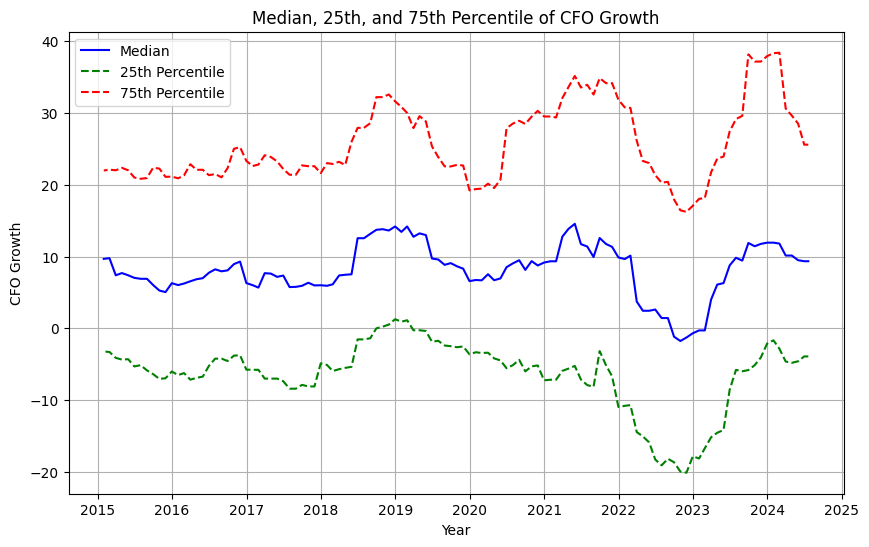

In [19]:
# Calculate the median, 25th percentile and 75 percentile CFO growth
median_cfo_growth = df_cfogrowth.median(axis=1)
q25_cfo_growth = df_cfogrowth.quantile(0.25, axis=1)  # 25th percentile
q75_cfo_growth = df_cfogrowth.quantile(0.75, axis=1)  # 75th percentile


# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(median_cfo_growth.index, median_cfo_growth, label='Median', color='blue')
plt.plot(q25_cfo_growth.index, q25_cfo_growth, label='25th Percentile', color='green', linestyle='--')
plt.plot(q75_cfo_growth.index, q75_cfo_growth, label='75th Percentile', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('CFO Growth')
plt.title('Median, 25th, and 75th Percentile of CFO Growth')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In 2020, companies in the upper percentile unexpectedly experienced a significant decline in one-year cash flow growth expectations, while those in the lower percentile saw minimal change. This likely stemmed from a more conservative approach to cash flow forecasting among higher-percentile companies. By 2023, all companies faced a sharp drop in one-year cash flow growth expectations, driven by the Federal Reserve's aggressive interest rate hikes in 2022.

### Correlational Analysis with Returns

In [20]:
# Get returns data
returns_df = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name='Returns', index_col=0)
returns_df = returns_df.sort_index(ascending=True)


In [51]:
returns_df.columns = [column.split(":")[-1] for column in returns_df.columns]
returns_df.columns

Index(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL', 'META', 'BRK.B', 'AVGO',
       'TSLA', 'LLY',
       ...
       'IVZ', 'DVA', 'AAL', 'MHK', 'BEN', 'RL', 'BIO', 'PARA', 'FOX', 'NWS'],
      dtype='object', length=496)

In [52]:
def drop_cols_with_many_zeros(df, threshold=0.5):
    # Calculate the percentage of 0s in each column
    zero_ratio = (df == 0).sum() / len(df)
    # Keep only columns where the ratio of 0s is less than the threshold
    return df.loc[:, zero_ratio < threshold]

def clean_feature(df):
    df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).astype(float)
    df = drop_cols_with_many_zeros(df)
    return df

In [53]:
returns_df_cleaned = clean_feature(returns_df)

C:\Users\teamc\AppData\Local\Temp\ipykernel_20204\824793836.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).astype(float)


In [54]:
returns_df_cleaned =  returns_df_cleaned.loc[df_cfogrowth.index]
returns_df_cleaned

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,TSLA,LLY,...,IVZ,DVA,AAL,MHK,BEN,RL,BIO,PARA,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-20,-0.022016,0.064999,-0.045410,-0.052367,-0.024650,-0.054401,0.068019,-0.019950,0.208813,-0.052917,...,0.083556,-0.004474,-0.066196,0.136015,0.051007,-0.055695,0.086815,0.108758,0.072142,-0.007045
2024-06-30,0.076651,0.095553,0.126850,0.095273,0.055942,0.080093,-0.018340,0.208483,0.111186,0.103664,...,-0.047740,-0.058116,-0.014783,-0.068400,-0.052966,-0.063249,-0.047933,-0.127624,0.002505,0.018293
2024-05-31,0.066268,0.128691,0.268871,0.008229,0.059712,0.085222,0.044539,0.021749,-0.028372,0.050237,...,0.108680,0.058341,-0.148779,0.057319,0.033275,0.142019,0.063429,0.045654,0.113668,0.136104
2024-04-30,-0.074610,-0.006706,-0.043760,-0.029826,0.078513,-0.114111,-0.056573,-0.018968,0.042608,0.004036,...,-0.145871,0.006954,-0.119870,-0.118955,-0.187478,-0.128462,-0.220083,-0.032285,0.002096,-0.093126
2024-03-31,0.017116,-0.051286,0.142128,0.020480,0.090062,-0.009283,0.027162,0.019162,-0.129235,0.032215,...,0.076574,0.087265,-0.021046,0.103440,0.024044,0.009897,0.061342,0.066123,0.045289,-0.033226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-31,-0.036595,0.040991,-0.002938,0.017663,-0.006287,0.005332,0.012676,0.266855,0.109489,0.097816,...,-0.038387,0.033046,-0.122502,0.075735,-0.012607,-0.022562,0.073782,-0.006599,NaN,-0.039820
2015-04-30,0.196409,0.005786,0.060692,0.133512,-0.010690,-0.041902,-0.021549,-0.079540,0.197489,-0.010736,...,0.043588,-0.002215,-0.085165,-0.065949,0.004677,0.014525,-0.005400,0.024740,NaN,-0.018904
2015-03-31,-0.072862,-0.031372,-0.051442,-0.021202,-0.014095,0.041092,-0.020962,-0.005015,-0.071653,0.035343,...,-0.014403,0.089544,0.101879,0.007594,-0.046628,-0.043010,0.062903,0.025888,NaN,-0.056480


### Comparing Median Over Time

In [60]:
returns_median = returns_df_cleaned.mean(axis=1)
cfogrowth_median = df_cfogrowth.mean(axis=1)

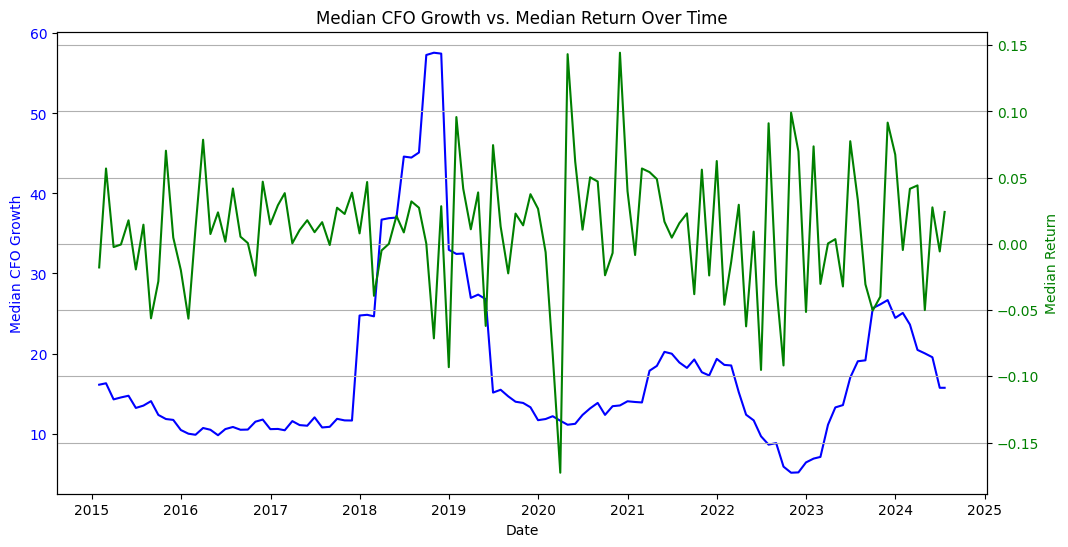

In [61]:
def median_comparison_viz(median_feature_df, median_returns_df, feature):
    fig, ax1 = plt.subplots(figsize=(12, 6))


    # Plot feature on the left y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'Median {feature}', color='blue')
    ax1.plot(median_feature_df,color='blue', label=f'Median {feature}')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis for returns
    ax2 = ax1.twinx()
    ax2.set_ylabel('Median Return', color='green')
    ax2.plot(median_returns_df, color='green', label='Median Return')
    ax2.tick_params(axis='y', labelcolor='green')


    plt.title(f'Median {feature} vs. Median Return Over Time')
    plt.grid(True)

median_comparison_viz(cfogrowth_median, returns_median, 'CFO Growth')

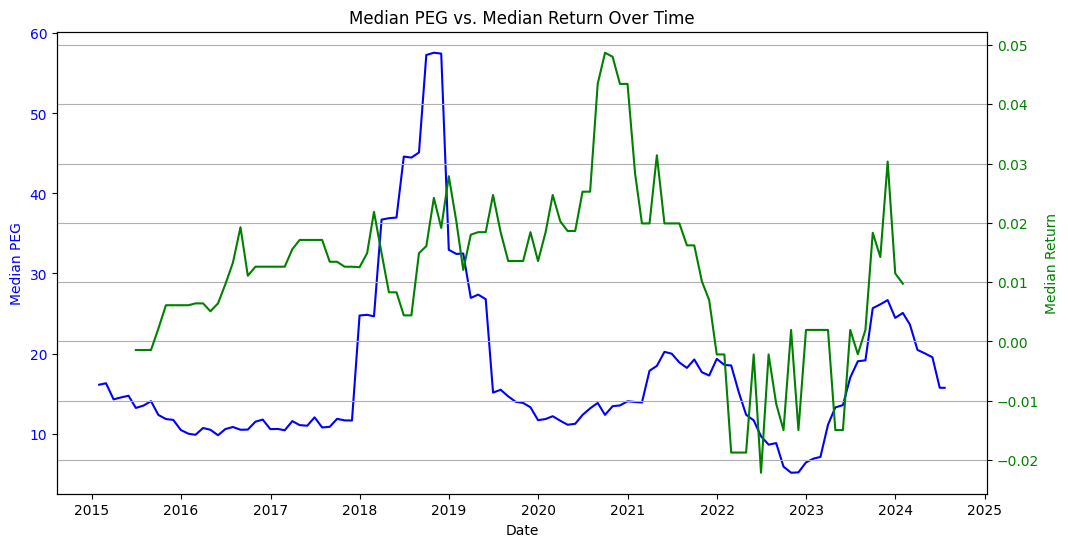

In [72]:
# using 12 month rolling medians
returns_smoothed = returns_median.rolling(window=12, center=True).median()
cfo_smoothed = cfogrowth_median.rolling(window=12, center=True).median()
median_comparison_viz(cfogrowth_median, returns_smoothed, 'PEG')


By comparing the movement of median CFO Growth vs Monthly Returns over time, there is no discernable relationship between these values.
When using 12-month rolling medians, it appears there is a possible lagged relationship between CFO growth and Returns. 

#### Correlation Coefficient 

In [62]:
def merged_long(feature_df, returns_df, feature):
    feature_long = feature_df.reset_index().melt(id_vars='Date', var_name='Company', value_name=feature)
    returns_long = returns_df.reset_index().melt(id_vars='Date', var_name='Company', value_name='Return')

    for df in [feature_long, returns_long]:
        df['Date'] = pd.to_datetime(df['Date']) # Ensure datetime and sort
        df.sort_values(['Company', 'Date'], inplace=True)
    

# Merge dataframe on Date and Company
    merged_df = feature_long.merge(returns_long, on=['Date', 'Company'])
    merged_df = merged_df.dropna() #drop missing values

    return  merged_df

merged_df = merged_long(df_cfogrowth, returns_df_cleaned, 'CFO Growth')
merged_df

,Date,Company,CFO Growth,Return
0,2015-01-31,A,18.7102,-0.077430
1,2015-02-28,A,18.7102,0.117554
2,2015-03-31,A,18.7102,-0.015636
3,2015-04-30,A,4.8604,-0.004332
4,2015-05-31,A,4.8604,-0.004351
...,...,...,...,...
45305,2024-03-31,ZTS,11.4776,-0.146826
45306,2024-04-30,ZTS,11.4776,-0.058921
45307,2024-05-31,ZTS,11.4776,0.064808
45308,2024-06-30,ZTS,35.9679,0.022411


In [63]:
corr_coef =  merged_df[['CFO Growth', 'Return']].corr()
corr_coef

,CFO Growth,Return
CFO Growth,1.000000,0.011203
Return,0.011203,1.000000


<div class="alert alert-block alert-info">
 Correlation between CFO Growth and Returns: <b> 0.01</b>
</div>

#### Quartile to Next Month Return Analysis

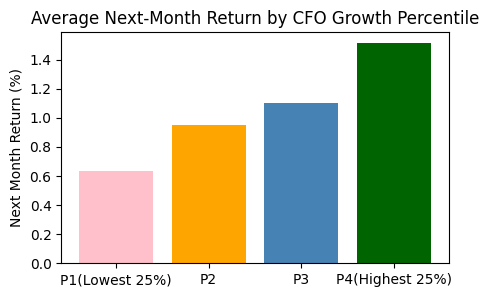

In [68]:
def plot_quartile_returns(feature_df, return_df, feature):    
    # Assign quartiles row-wise
    quartiles = feature_df.apply(
        lambda x: pd.qcut(x, 4, labels=["P1(Lowest 25%)", "P2", "P3", "P4(Highest 25%)"]),
        axis=1
    )

    # Calculate average returns by quartile
    quartile_returns = []
    quartile_labels = ["P1(Lowest 25%)", "P2", "P3", "P4(Highest 25%)"]

    return_df = return_df.shift(-1)  #shift the return to next month data

    for quartile in quartile_labels:
        mask = (quartiles == quartile)
        avg_return = return_df[mask].mean(axis=1)
        quartile_returns.append(avg_return)

    # Combine into a summary DataFrame
    quartile_df = pd.concat(quartile_returns, axis=1)
    quartile_df.columns = quartile_labels

    # Plot average return by quartile
    mean_returns = quartile_df.mean()
    x = mean_returns.index
    y = mean_returns.values * 100  # convert to %

    plt.figure(figsize=(5, 3))
    plt.bar(x, y, color=['pink', 'orange', 'steelblue', 'darkgreen'])
    plt.title(f"Average Next-Month Return by {feature} Percentile")
    plt.ylabel("Next Month Return (%)")
    plt.xticks(rotation=0)
   

plot_quartile_returns(df_cfogrowth, returns_df_cleaned, "CFO Growth")

This graph shows that the higher the CFO Growth figure, the higher the next-month return, suggesting there is a lagged positive correlation between CFO Growth and stock returns. 

### SUMMARY OF FINDINGS:



* <b>Short-Term Company-level Analysis</b>: 

There is no significant correlation between CFO Growth and returns when examining individual companies over the same short time periods.

* <b>Lagged and Aggregated Analysis</b>: 

When using lagged rolling medians (12-month)and quartile-based CFO Growth vs next-month aggregated returns, a possible correlation emerges. However, this relationship may not be robust enough for predictive use due to the use of aggregate data. 